In [40]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import glob

%matplotlib inline
%config IPCompleter.greedy=True

In [14]:
path = '../../resultados/heapsort' # use your path
all_files = glob.glob(path + "/*.csv")
all_files.sort()
li = []

d = {'n': [], 'minimo': [],'maximo': [], 'media': [] }
df_res = pd.DataFrame(data=d)

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0,  delimiter=';', encoding='ISO-8859-1')
    n = int(filename[35:-4])
    minimo = df["duracao (ms)"].min()
    maximo = df["duracao (ms)"].max()
    media = df["duracao (ms)"].mean()
    df_res.loc[len(df_res)] = [n,minimo,maximo,media]
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [76]:
df_res

,n,minimo,maximo,media
0,10.0,0.000000,0.000000,0.000000
1,100.0,0.000000,0.000000,0.000000
2,1000.0,0.000000,15.670300,7.819295
3,10000.0,109.309196,218.649626,143.707728
4,100000.0,1666.291952,2249.510288,2013.061357
5,1000000.0,23025.793791,24072.464943,23507.825875
6,25.0,0.000000,0.000000,0.000000
7,250.0,0.000000,15.614748,1.561475
8,2500.0,15.587091,46.866655,32.791877
9,25000.0,343.620777,390.570164,368.649077


In [20]:
df_res_sort = df_res.sort_values(by=['n'])
df_res_sort

,n,minimo,maximo,media
0,10.0,0.000000,0.000000,0.000000
6,25.0,0.000000,0.000000,0.000000
12,50.0,0.000000,15.620470,1.562047
18,75.0,0.000000,0.000000,0.000000
1,100.0,0.000000,0.000000,0.000000
7,250.0,0.000000,15.614748,1.561475
13,500.0,0.000000,15.666008,7.810783
19,750.0,0.000000,15.660524,9.382343
2,1000.0,0.000000,15.670300,7.819295
8,2500.0,15.587091,46.866655,32.791877


In [43]:
figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

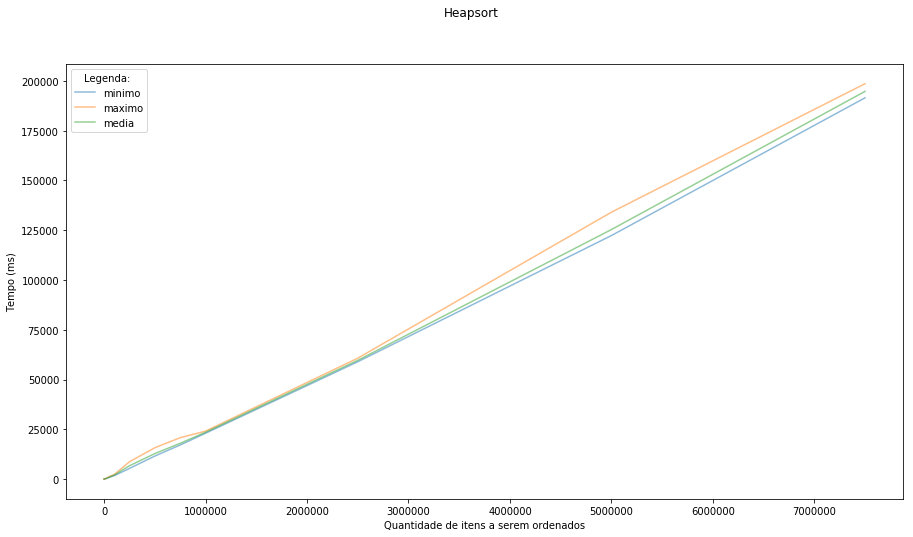

In [79]:
#fig, ax = plt.subplot()
#ax.plot()
figure(figsize=(15,8))
df_res_sort = df_res.sort_values(by=['n'])


plt.plot(df_res_sort["n"], df_res_sort["minimo"], label='minimo', alpha=0.5)
plt.plot(df_res_sort["n"], df_res_sort["maximo"], label='maximo', alpha=0.5)
plt.plot(df_res_sort["n"], df_res_sort["media"], label='media', alpha=0.5)

plt.legend(title='Legenda: ')
plt.ylabel('Tempo (ms)')
plt.xlabel('Quantidade de itens a serem ordenados')
plt.suptitle('Heapsort')
plt.show()

,n,minimo,maximo,media
0,10.0,0.000000,0.000000,0.000000
6,25.0,0.000000,0.000000,0.000000
12,50.0,0.000000,15.620470,1.562047
18,75.0,0.000000,0.000000,0.000000
1,100.0,0.000000,0.000000,0.000000
7,250.0,0.000000,15.614748,1.561475
13,500.0,0.000000,15.666008,7.810783
19,750.0,0.000000,15.660524,9.382343
2,1000.0,0.000000,15.670300,7.819295
8,2500.0,15.587091,46.866655,32.791877


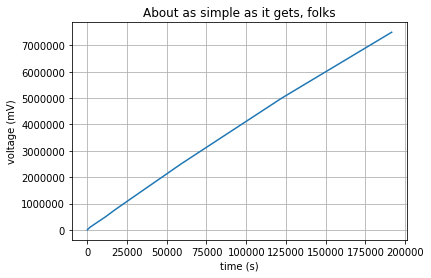

In [64]:
fig, ax = plt.subplots()
ax.plot(df_res_sort["minimo"], df_res_sort["n"])

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()